#TRAFFIC LIGHT DETECTION USING FASTERRCNN

In [1]:
!pip install opencv-python-headless
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
# Imports
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [28]:
# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the transformation
def transform_image(image):
    transform = T.Compose([T.ToTensor()])
    return transform(image).unsqueeze(0)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[{'boxes': tensor([[  65.5696,  553.7877,  374.8331,  713.9094],
        [ 217.9779,  363.5650,  246.6104,  423.1705],
        [  33.6616,   69.6505,   68.4468,  162.3308],
        [ 642.4631,  382.2663,  665.9001,  439.6373],
        [ 463.8421,  108.5702,  493.9199,  172.9703],
        [ 326.4661,  547.8646,  430.2944,  679.5151],
        [1069.4802,  336.8319, 1099.4974,  397.7458],
        [ 957.3188,  520.3074, 1194.0775,  670.7556],
        [ 783.6236,  361.9430,  821.5530,  429.2778],
        [1214.7466,  314.5183, 1243.4476,  384.0621],
        [1099.1178,  502.6642, 1278.1576,  638.9389],
        [1144.9969,  490.7700, 1280.0000,  599.1014],
        [ 932.7130,  482.7970, 1008.6112,  519.8772],
        [ 893.3226,   56.8106,  923.4559,  133.4174],
        [ 305.5900,  524.7194,  360.6264,  576.2609],
        [ 259.0903,  504.9411,  335.8178,  571.5320],
        [1081.9559,  487.4506, 1161.8167,  514.6686],
        [ 895.3110,   92.3300,  923.1415,  132.4195],
        [ 304.073

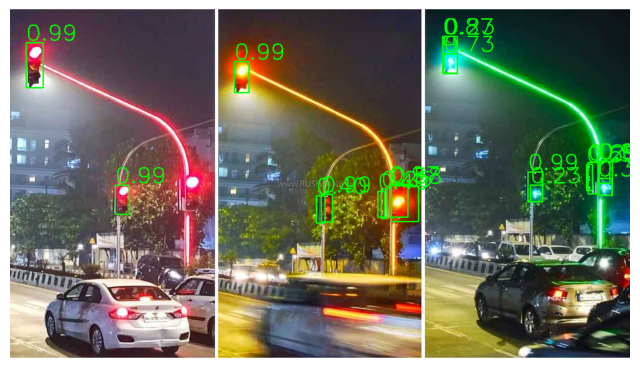

In [31]:
# Load and preprocess the image
image_path = "/content/mumbai-led-light-traffic-signal-2021.jpg"
image = Image.open(image_path)
image_tensor = transform_image(image)

# Perform object detection
with torch.no_grad():
    prediction = model(image_tensor)
print(prediction)
print(prediction[0]['labels'])

# Process the prediction to extract traffic light bounding boxes and scores
traffic_lights = [(box, score) for box, label, score in zip(prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']) if label == 10  and score > 0.2] #and score > 0.2

# Draw bounding boxes and scores on the image
image_np = np.array(image).copy()
for box, score in traffic_lights:
    cv2.rectangle(image_np, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    font_scale = 1.5
    text = f"{score:.2f}"
    cv2.putText(image_np, text, (int(box[0]), int(box[1] - 5)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(image_np)
plt.axis('off')
plt.show()

# TRAFFIC LIGHT DETECTION USING YOLOV8

In [12]:
!pip install ultralytics
!pip install ppyaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 15.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement ppyaml (from versions: none)
ERROR: No matching distribution found for ppyaml


In [14]:
import os


image 1/1 /content/mumbai-led-light-traffic-signal-2021.jpg: 384x640 3 persons, 8 cars, 1 motorcycle, 5 traffic lights, 199.5ms
Speed: 2.7ms preprocess, 199.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels
traffic light


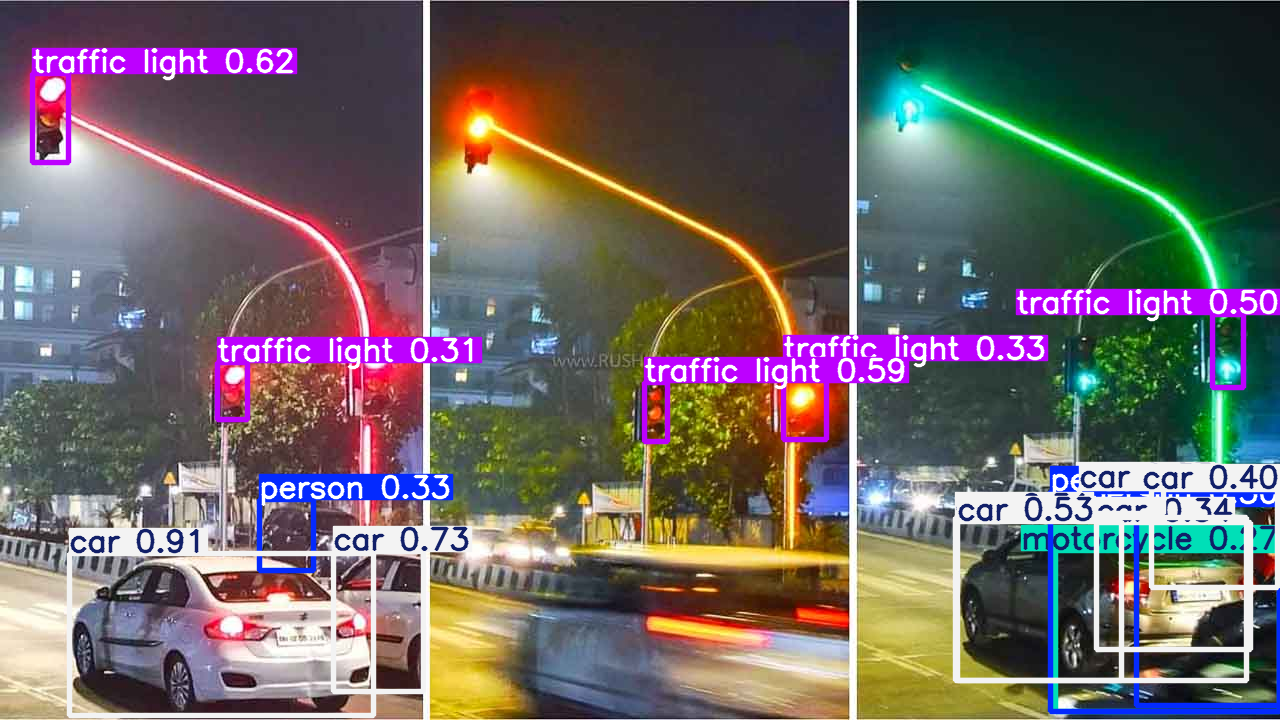

In [32]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO
import yaml

file_path = '/content/mumbai-led-light-traffic-signal-2021.jpg'
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
# model.train(data='coco8.yaml', epochs=3)  # train the model
result_predict = model.predict(file_path, save=True, save_txt=True)  # predict on an image
print(result_predict[0].names[9])

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


**You can see car is also getting predicted. We need to get the label names to extract only the traffic lights bbox from the pretrained model prediction**

In [33]:
filename = "../usr/local/lib/python3.10/dist-packages/ultralytics/cfg/datasets/coco8.yaml"
with open(filename, 'r') as stream:
  names = yaml.safe_load(stream)['names']


In [34]:
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [37]:
file_name = os.path.splitext(os.path.basename(file_path))[0]
print(file_name)
cordinates_list = open(f'/content/runs/detect/predict4/labels/{file_name}.txt', 'r').readlines()
cordinates_list

mumbai-led-light-traffic-signal-2021


['2 0.172994 0.880994 0.237199 0.225347\n',
 '2 0.295829 0.863509 0.0701046 0.194596\n',
 '9 0.0393767 0.163595 0.0280949 0.122971\n',
 '9 0.512509 0.572693 0.0175996 0.0818272\n',
 '2 0.812126 0.834346 0.128799 0.220868\n',
 '2 0.860091 0.83223 0.227826 0.226055\n',
 '9 0.959595 0.487281 0.0244839 0.100596\n',
 '2 0.948865 0.747494 0.098238 0.13592\n',
 '2 0.876265 0.695956 0.0659084 0.0352883\n',
 '2 0.916462 0.814525 0.120203 0.176502\n',
 '0 0.22386 0.743409 0.0419186 0.0991402\n',
 '9 0.628981 0.555426 0.0337597 0.10864\n',
 '9 0.1816 0.5432 0.0232656 0.0801391\n',
 '0 0.910203 0.835895 0.179065 0.305538\n',
 '0 0.943732 0.840588 0.11157 0.279875\n',
 '3 0.911972 0.87615 0.175419 0.223323\n',
 '2 0.876753 0.70087 0.0716625 0.0478129\n']

**From the above name dictionary, we can see that the key for traffic light is 9 so we are focusing only on the label with key = 9**

In [38]:
cordinates_with_traffic_lights = []
for cordinate in cordinates_list:
  index = int(cordinate.split()[0])
  print(index, names[index])
  if index == 9:
    cordinates_with_traffic_lights.append(cordinate)

2 car
2 car
9 traffic light
9 traffic light
2 car
2 car
9 traffic light
2 car
2 car
2 car
0 person
9 traffic light
9 traffic light
0 person
0 person
3 motorcycle
2 car


In [39]:
cordinates_with_traffic_lights

['9 0.0393767 0.163595 0.0280949 0.122971\n',
 '9 0.512509 0.572693 0.0175996 0.0818272\n',
 '9 0.959595 0.487281 0.0244839 0.100596\n',
 '9 0.628981 0.555426 0.0337597 0.10864\n',
 '9 0.1816 0.5432 0.0232656 0.0801391\n']

In [40]:
img = cv2.imread(file_path)
h,w = img.shape[0], img.shape[1]
h,w

(720, 1280)

**Here xc and yc are the x and y cordinates of the center respectively. Also, nw and nh are normalized width and height**

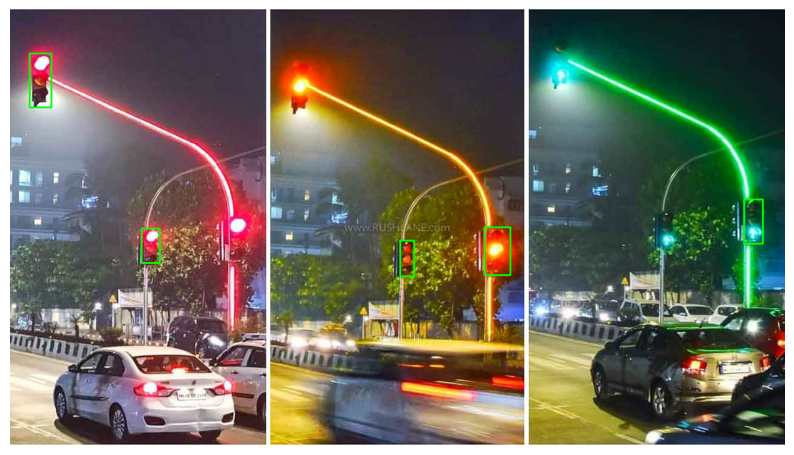

In [41]:
import matplotlib.pyplot as plt
for cor in cordinates_with_traffic_lights:
  xc, yc, nw, nh = map(float, cor.split()[1:])
  xc*=w
  yc*=h
  nw*=w
  nh*=h
  top_left= int(xc-nw/2), int(yc-nh/2)
  bottom_right = int(xc+nw/2), int(yc+nh/2)
  img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 2)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes ticks
plt.show()